In [1]:
from analysis_functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
new_uqc_path = "../../results/uqc_encoding/4qubits_continuous_encoding"
old_uqc_path = "../../results/overparametrization/4_qubits_5layer"

new_uqc = Analysis(new_uqc_path)
old_uqc = Analysis(old_uqc_path)

In [3]:
new_uqc_return = new_uqc.get_rewards()
old_uqc_return = old_uqc.get_rewards()

new_uqc_mean = np.mean(new_uqc_return, axis=0)
old_uqc_mean = np.mean(old_uqc_return, axis=0)

new_uqc_std = np.std(new_uqc_return, axis=0)
old_uqc_std = np.std(old_uqc_return, axis=0)

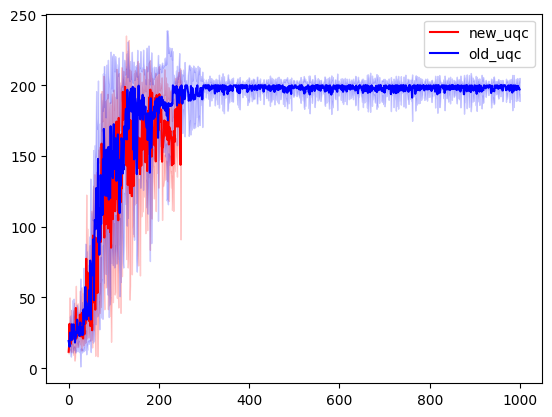

In [4]:
plt.plot(new_uqc_mean, color = "red", label="new_uqc")
plt.plot(old_uqc_mean, color = "blue", label="old_uqc")
plt.fill_between(np.arange(len(new_uqc_mean)), new_uqc_mean - new_uqc_std, new_uqc_mean + new_uqc_std, color = "red", alpha = 0.2)
plt.fill_between(np.arange(len(old_uqc_mean)), old_uqc_mean - old_uqc_std, old_uqc_mean + old_uqc_std, color = "blue", alpha = 0.2)
plt.legend()
plt.show()


# Specifying no differentiator in the ControlledPQC VS Specifying ParameterShiftRule()

Supposedly when no differentiator is specified in the ControlledPQC, the default differentiator is ParameterShiftRule(). So let's see if this is true.

In [2]:
no_differentiator_path = "../../results/testing/skolik_old"
differentiator_path = "../../results/testing/skolik_parameter_shift"

no_differentiator = Analysis(no_differentiator_path)
differentiator = Analysis(differentiator_path)

In [3]:
no_differentiator_return = no_differentiator.get_rewards()
differentiator_return = differentiator.get_rewards()

no_differentiator_mean = np.mean(no_differentiator_return, axis=0)
differentiator_mean = np.mean(differentiator_return, axis=0)

no_differentiator_std = np.std(no_differentiator_return, axis=0)
differentiator_std = np.std(differentiator_return, axis=0)

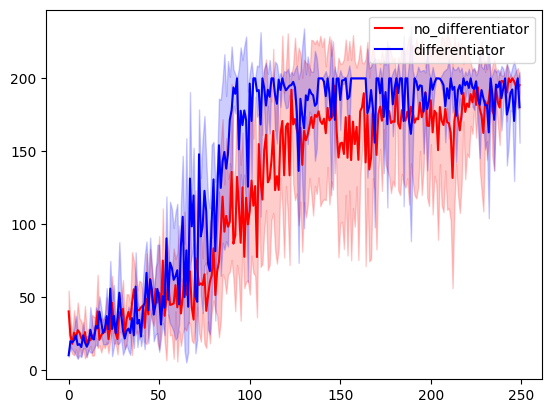

In [4]:
plt.plot(no_differentiator_mean, color = "red", label="no_differentiator")
plt.plot(differentiator_mean, color = "blue", label="differentiator")
plt.fill_between(np.arange(len(no_differentiator_mean)), no_differentiator_mean - no_differentiator_std, no_differentiator_mean + no_differentiator_std, color = "red", alpha = 0.2)
plt.fill_between(np.arange(len(differentiator_mean)), differentiator_mean - differentiator_std, differentiator_mean + differentiator_std, color = "blue", alpha = 0.2)
plt.legend()
plt.show()


The performance is very similar and the difference can be attributed to the randomness in the data.

# Now I want to see whether fixing the numpy ans tensorflow random seeds will make the results reproducible.

In [5]:
numpy_seed_path = "../../results/testing/skolik_numpy_seed"

numpy_seed = Analysis(numpy_seed_path)

In [6]:
numpy_seed_return = numpy_seed.get_rewards()	

numpy_seed_mean = np.mean(numpy_seed_return, axis=0)

numpy_seed_std = np.std(numpy_seed_return, axis=0)

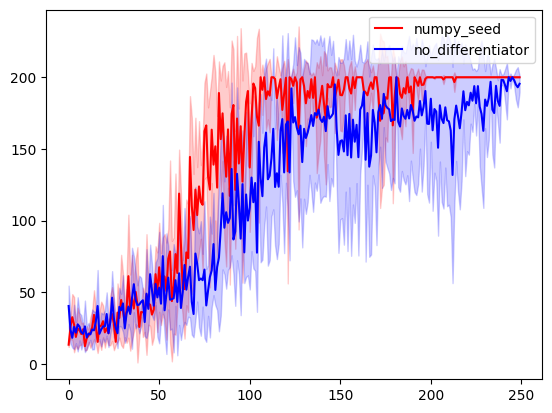

In [7]:
plt.plot(numpy_seed_mean, color = "red", label="numpy_seed")
plt.fill_between(np.arange(len(numpy_seed_mean)), numpy_seed_mean - numpy_seed_std, numpy_seed_mean + numpy_seed_std, color = "red", alpha = 0.2)
plt.plot(no_differentiator_mean, color = "blue", label="no_differentiator")
plt.fill_between(np.arange(len(no_differentiator_mean)), no_differentiator_mean - no_differentiator_std, no_differentiator_mean + no_differentiator_std, color = "blue", alpha = 0.2)
plt.legend()
plt.show()
